<a href="https://colab.research.google.com/github/Vamsi-2203/Twitter-Sentiment-Analysis-with-BERT/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install emoji==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 4.7 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=130b7afda4ffb9791d02cb68576c4489a756d95c9f428515dd2caf721dc84eed
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 1.0.0
    Uninstalling emoji-1.0.0:
      Successfully uninstalled emoji-1.0.0


In [2]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.6 MB/s 
     |████████████████████████████████| 6.6 MB 38.4 MB/s 
     |████████████████████████████████| 120 kB 49.4 MB/s 


In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import emoji
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast, TFBertModel


#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

In [12]:
data = pd.read_csv('/content/Corona_NLP_train.csv',encoding='ISO-8859-1')
data_test = pd.read_csv('/content/Corona_NLP_test.csv')

In [13]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [14]:
data_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [16]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [17]:
data.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [18]:
data_test.isna().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [19]:
data['TweetAt'] = pd.to_datetime(data['TweetAt'])

In [20]:
data.drop_duplicates(subset='OriginalTweet',inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       32567 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.2+ MB


In [22]:
NO_OF_tweets_per_day = data['TweetAt'].dt.strftime('%m-%d').value_counts().sort_index().reset_index(name='counts')

In [23]:
NO_OF_tweets_per_day.head()

,index,counts
0,01-04,630
1,02-04,954
2,03-04,810
3,03-16,656
4,03-17,1977


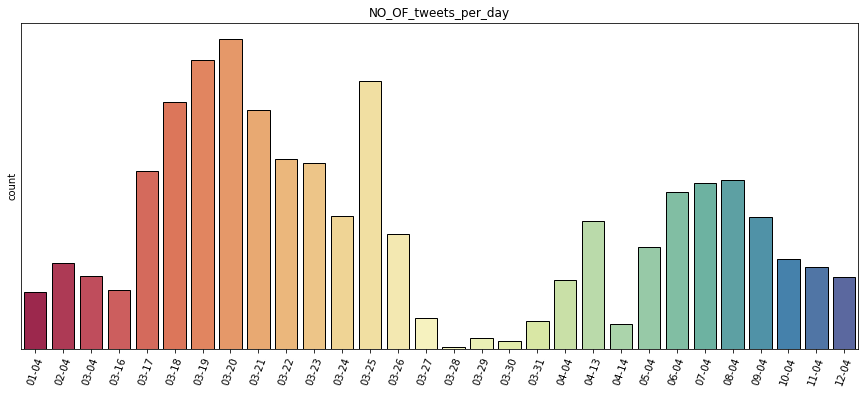

In [24]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='index', y='counts', data=NO_OF_tweets_per_day,edgecolor = 'black',ci=False, palette='Spectral')
plt.title('NO_OF_tweets_per_day')
plt.xticks(rotation=70)
plt.yticks([])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [25]:
data = data[['OriginalTweet','Sentiment']]

In [26]:
data_test = data_test[['OriginalTweet','Sentiment']]

In [27]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

#Clean emojis from text
#def strip_emoji(text):
    #return re.sub(emoji.distinct_emoji_list(string), r"", text) #remove emoji

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', ' ').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [28]:
texts_new = []
for t in data.OriginalTweet:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))

In [29]:
texts_new_test = []
for t in data_test.OriginalTweet:
    texts_new_test.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))

In [30]:
# create new columns
data['text_clean'] = texts_new
data_test['text_clean'] = texts_new_test

In [31]:
data['text_clean'].head()

0                                              and and
1    advice talk to your neighbours family to excha...
2    coronavirus australia woolworths to give elder...
3    my food stock is not the only one which is emp...
4    me ready to go at supermarket during the covid...
Name: text_clean, dtype: object

In [32]:
data_test['text_clean'].head()

0    trending new yorkers encounter empty supermark...
1    when i couldnt find hand sanitizer at fred mey...
2    find out how you can protect yourself and love...
3    panic buying hits newyork city as anxious shop...
4    toiletpaper dunnypaper coronavirus coronavirus...
Name: text_clean, dtype: object

In [33]:
data['text_clean'][1:8].values

array(['advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order',
       'coronavirus australia woolworths to give elderly disabled dedicated shopping hours amid covid19 outbreak',
       'my food stock is not the only one which is empty please dont panic there will be enough food for everyone if you do not take more than you need stay calm stay safe covid19france covid19 covid19 coronavirus confinement confinementotal confinementgeneral',
       'me ready to go at supermarket during the covid19 outbreak not because im paranoid but because my food stock is litteraly empty the coronavirus is a serious thing but please dont panic it causes shortage coronavirusfrance restezchezvous stayathome confinement',
       'as news of the regions first confirmed covid19 case came out of sullivan county last week people 

In [34]:
#column for the cleaned text
text_len = []
for text in data.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [35]:
data['text_len'] = text_len

In [36]:
text_len_test = []
for text in data_test.text_clean:
    tweet_len = len(text.split())
    text_len_test.append(tweet_len)

In [37]:
data_test['text_len'] = text_len_test

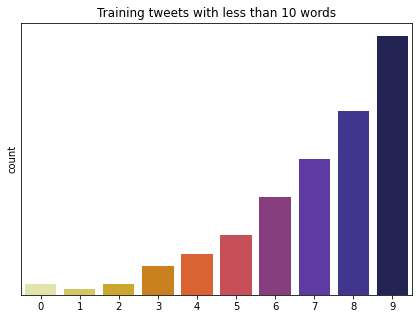

In [38]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=data[data['text_len']<10], palette='CMRmap_r')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
plt.ylabel('count')
plt.xlabel('')
plt.show()

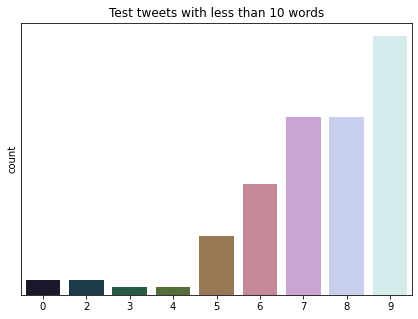

In [39]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=data_test[data_test['text_len']<10], palette='cubehelix')
plt.title('Test tweets with less than 10 words')
plt.yticks([])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [40]:
# data after clearning
print(f" DF SHAPE: {data.shape}")
print(f" DF TEST SHAPE: {data_test.shape}")

 DF SHAPE: (41157, 4)
 DF TEST SHAPE: (3798, 4)


In [41]:
data = data[data['text_len'] > 4]

In [42]:
data.head()

,OriginalTweet,Sentiment,text_clean,text_len
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,13
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,41
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the covid...,39
5,As news of the regionÂs first confirmed COVID...,Positive,as news of the regions first confirmed covid19...,34


In [43]:
data_test = data_test[data_test['text_len'] > 4]

In [44]:
data_test.head()

,OriginalTweet,Sentiment,text_clean,text_len
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,trending new yorkers encounter empty supermark...,21
1,When I couldn't find hand sanitizer at Fred Me...,Positive,when i couldnt find hand sanitizer at fred mey...,29
2,Find out how you can protect yourself and love...,Extremely Positive,find out how you can protect yourself and love...,12
3,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city as anxious shop...,35
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavirus...,25


In [45]:
print(f" DF SHAPE: {data.shape}")
print(f" DF TEST SHAPE: {data_test.shape}")

 DF SHAPE: (40935, 4)
 DF TEST SHAPE: (3792, 4)


In [46]:
#Training data deeper cleaning

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [47]:
tokenizer

PreTrainedTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [48]:
token_lens = []

for txt in data['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [49]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 100


In [50]:
token_lens = []

for i,txt in enumerate(data['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>100:
        print(f"INDEX: {i}, TEXT: {txt}")  

In [51]:
data['token_lens'] = token_lens

In [52]:
data = data.sort_values(by='token_lens', ascending=False)
data.head(20)

,OriginalTweet,Sentiment,text_clean,text_len,token_lens
1638,ZÃ¡sah policie proti spekulant?m s rouÂkami. ...,Neutral,zsah policie proti spekulantm s roukami na mj ...,39,100
37156,11 Nisan Cumartesi itibariyle ?BBÂnin tÃ¼m hi...,Neutral,11 nisan cumartesi itibariyle bbnin tm hizmetl...,39,98
16632,Bir mÃ¼ddettir sÃ¼permarketlerin lojistik hizm...,Neutral,bir mddettir spermarketlerin lojistik hizmeti ...,36,92
13691,Hoy aplaudo a mi segunda familia #AplaudoANues...,Neutral,hoy aplaudo a mi segunda familia aplaudoanuest...,38,84
27005,Supermercados Econo confirman que un empleado ...,Neutral,supermercados econo confirman que un empleado ...,39,80
14593,"Na, wer war denn da am Werk? Gestern Nachmitta...",Extremely Negative,na wer war denn da am werk gestern nachmittag ...,37,80
28899,Kindly contact Us bamy global merchandise for ...,Positive,kindly contact us bamy global merchandise for ...,37,80
11213,Keine WertgegenstÃ¤nde im Fahrzeug lassen! - D...,Negative,keine wertgegenstnde im fahrzeug lassen diesen...,33,79
4844,Impct of #coronavirus i hve sen hw civilizd pp...,Extremely Negative,impct of coronavirus i hve sen hw civilizd ppl...,48,79
18913,#CroozefmNews \r\r\nPresident Museveni has ord...,Extremely Negative,croozefmnews president museveni has ordered th...,35,79


In [53]:
data = data.iloc[100:]
data.head()

,OriginalTweet,Sentiment,text_clean,text_len,token_lens
35866,MDOC Horhn MS65 50 MS brown MISSISSIPPI PRISON...,Extremely Negative,mdoc horhn ms65 50 ms brown mississippi prison...,51,68
11077,"As a direct result, IÂm out of cludger cos th...",Negative,as a direct result im out of cludger cos they ...,51,68
9877,'after rump said Thursday that hydroxychloroqu...,Extremely Positive,after rump said thursday that hydroxychloroqui...,27,68
15863,#dirkvandenbroek Vakkenvuller naar huis gestuu...,Neutral,dirkvandenbroek vakkenvuller naar huis gestuur...,28,68
30567,40 Things you should never touch due to #coron...,Negative,40 things you should never touch due to corona...,33,68


In [54]:
#shuffle it and reset the index
data = data.sample(frac=1).reset_index(drop=True)

In [55]:
data.head()

,OriginalTweet,Sentiment,text_clean,text_len,token_lens
0,"#Covid19: #SupermarketOwners, #customers reque...",Neutral,covid19 supermarketowners customers request va...,5,15
1,Latest data show that grain prices in China ha...,Positive,latest data show that grain prices in china ha...,23,28
2,ATTENTION to all my @Twitch friends and fellow...,Extremely Positive,attention to all my friends and fellow america...,50,56
3,Going to the grocery store. One month ago they...,Extremely Positive,going to the grocery store one month ago theyd...,36,43
4,@nuernberg_de few grocery stores have increase...,Negative,few grocery stores have increased the prices o...,33,38


In [56]:
token_lens_test = []

for txt in data_test['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    
max_len=np.max(token_lens_test)

In [57]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")


MAX TOKENIZED SENTENCE LENGTH: 96


In [58]:
token_lens_test = []

for i,txt in enumerate(data_test['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    if len(tokens)>100:
        print(f"INDEX: {i}, TEXT: {txt}")

In [59]:
data_test['token_lens'] = token_lens_test

In [60]:
data_test = data_test.sort_values(by='token_lens', ascending=False)
data_test.head(10) 

,OriginalTweet,Sentiment,text_clean,text_len,token_lens
286,@Rhett800cc So hard to decide??. As much as I ...,Negative,so hard to decide as much as i want to hodl my...,38,96
2383,Ahora seguid llorando por el papel higiénico (...,Negative,ahora seguid llorando por el papel higinico qu...,44,94
345,Informoval jsem zástupce vech obchodních ?et?...,Neutral,informoval jsem zstupce vech obchodnch etzc o ...,31,86
1485,DTF-Dont Touch Face\r\r\nDWBH-Do Wash Both Ha...,Extremely Negative,dtfdont touch face dwbhdo wash both hands gtfo...,42,77
1209,Im in the DC/Maryland/Virginia (DMV) area &am...,Positive,im in the dcmarylandvirginia dmv area amphave ...,45,74
3505,Stop misusing ur privilege amp grow up Some1 c...,Positive,stop misusing ur privilege amp grow up some1 c...,57,73
1789,"For those that are cashlong, patient,calm&amp;...",Extremely Positive,for those that are cashlong patientcalmamphave...,44,71
855,"Lidl is total chaos, queues as long as the ais...",Extremely Negative,lidl is total chaos queues as long as the aisl...,62,70
2740,COVID-19: Your government will save ITSELF not...,Positive,covid19 your government will save itself not y...,43,70
2997,Stop #frenzybuying. You don't need most of wha...,Extremely Negative,stop frenzybuying you dont need most of what y...,38,70


In [61]:
data_test = data_test.iloc[55:]
data_test.head(3)

,OriginalTweet,Sentiment,text_clean,text_len,token_lens
88,"Stay vigilant, stay safe. As we adapt to COVID...",Negative,stay vigilant stay safe as we adapt to covid19...,38,63
2607,"Its Saturday, Ive braved the grocery store &...",Extremely Positive,its saturday ive braved the grocery store amp ...,50,63
1742,It's a 2 hr long lineup to the billing in the ...,Negative,its a 2 hr long lineup to the billing in the d...,50,63


In [62]:
data_test = data_test.sample(frac=1).reset_index(drop=True)

In [63]:
data_test.head(10)

,OriginalTweet,Sentiment,text_clean,text_len,token_lens
0,"Don't worry, there is enough food for everyone...",Extremely Negative,dont worry there is enough food for everyone s...,23,30
1,Great prices on flights to Costa Rica right no...,Extremely Positive,great prices on flights to costa rica right no...,14,18
2,What's the difference in gathering for a baske...,Positive,whats the difference in gathering for a basket...,24,35
3,fuck coronavirus\r\r\n\r\r\nwho has a bill com...,Extremely Negative,fuck coronavirus who has a bill coming up that...,25,32
4,@spaceangel1964 Heading out to a supermarket n...,Positive,heading out to a supermarket now as my fridge ...,32,40
5,@dickssportingss really nice NOT to honor your...,Positive,really nice not to honor your little league co...,40,49
6,"Ill give you $200 for the toilet paper, $150...",Positive,ill give you 200 for the toilet paper 150 for ...,20,25
7,"""If it weren't for the media, we'd just think ...",Extremely Negative,if it werent for the media wed just think this...,42,61
8,Retail Council of Canada is reassuring people ...,Extremely Negative,retail council of canada is reassuring people ...,43,47
9,So the US govt buying oil (drives prices up) i...,Positive,so the us govt buying oil drives prices up is ...,31,35


In [64]:
# for balancing the samples
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(data['text_clean']).reshape(-1, 1), np.array(data['Sentiment']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text_clean', 'Sentiment']);

In [65]:
train_os['Sentiment'].value_counts()

Neutral               11354
Positive              11354
Extremely Positive    11354
Negative              11354
Extremely Negative    11354
Name: Sentiment, dtype: int64

In [66]:
X = train_os['text_clean'].values
y = train_os['Sentiment'].values

In [67]:
X

array(['covid19 supermarketowners customers request vatsuspension',
       'latest data show that grain prices in china have stayed stable since january 2020 despite massive disruptions of covid19 detailed data are here',
       'attention to all my friends and fellow americans amidst all of the coronavirus panic be sure to tip all of the faithful members of the food service industry as they are serving you in drivethrus and takout it is our duty to take care of one another during this time',
       ..., 'toilet roll cakes keep finnish baker in business 19',
       'supermarket sweep been preparing us for this for decades coronavirus covid19 hoarders',
       'im thankful i went grocery shopping before the panic hit and covid 19 was at least publicly known i have 3 weeks of tp if careful some food items we are starting to run low on'],
      dtype=object)

In [68]:
y

array(['Neutral', 'Positive', 'Extremely Positive', ..., 'Neutral',
       'Neutral', 'Neutral'], dtype=object)

In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [70]:
X_test = data_test['text_clean'].values
y_test = data_test['Sentiment'].values

In [71]:
X_test

array(['dont worry there is enough food for everyone says pm amid covid19 fears the star online hv u seen d panic buying spree',
       'great prices on flights to costa rica right now due to the covid19 sales',
       'whats the difference in gathering for a basketball or hockey game and gathering in a grocery store running around like maniacs covid19 coronapocolypse coronavirus',
       ...,
       'its okay well all be fine in torbay i never actually realised we had so many infectious disease experts in town they are all offering their knowledge amp expertise on various local spotted fb pages too covid19',
       'covid19 intense grocery store lines in new york city amp elsewhere as people prepare for what could be a long stretch at homethe global pandemic has affected various aspects of life in the us reveals the unique nature of this crisis coronaviruspakistan coronaoutbreak',
       'hey fellow new yorkers thousands of our fellow citizens experience food insecurity and rely on fo

In [72]:
y_test

array(['Extremely Negative', 'Extremely Positive', 'Positive', ...,
       'Positive', 'Extremely Negative', 'Negative'], dtype=object)

In [73]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [74]:
# one hot encoding 
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [75]:
y_train

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

In [76]:
y_valid

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [77]:
y_test

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [78]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 39739
VALIDATION DATA: 17031
TESTING DATA: 3737


In [79]:
# creating baseline model 
#tokenize the tweets using CountVectorizer
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

In [80]:
#TF-IDF  versions of the tokenized tweets
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

In [81]:
#Naive Bayes Classifier 
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tf, y_train_le)
nb_pred = nb_clf.predict(X_test_tf)

In [82]:
print('\tClassification Report for Naive Bayes:\n\n',classification_report(y_test_le,nb_pred, target_names=['Negative', 'Neutral', 'Positive','Extremely Negative', 'Extremely Positive']))

	Classification Report for Naive Bayes:

                     precision    recall  f1-score   support

          Negative       0.35      0.74      0.48       576
           Neutral       0.43      0.69      0.53       591
          Positive       0.45      0.29      0.36      1024
Extremely Negative       0.63      0.33      0.43       611
Extremely Positive       0.43      0.27      0.33       935

          accuracy                           0.43      3737
         macro avg       0.46      0.46      0.43      3737
      weighted avg       0.46      0.43      0.41      3737



In [83]:
#BERT Sentiment Analysis
MAX_LEN=128

In [84]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [85]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [86]:
# BERT modeling
#  import the BERT model from the pretrained library from Hugging face.
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [87]:
def create_model(bert_model, max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(5, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [88]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [89]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

Epoch 1/4
1242/1242 [==============================] - 1138s 894ms/step - loss: 0.8844 - categorical_accuracy: 0.6403 - val_loss: 0.5789 - val_categorical_accuracy: 0.7873
Epoch 2/4
1242/1242 [==============================] - 1112s 895ms/step - loss: 0.4946 - categorical_accuracy: 0.8178 - val_loss: 0.4756 - val_categorical_accuracy: 0.8242
Epoch 3/4
1242/1242 [==============================] - 1111s 895ms/step - loss: 0.3433 - categorical_accuracy: 0.8779 - val_loss: 0.3909 - val_categorical_accuracy: 0.8606
Epoch 4/4
1242/1242 [==============================] - 1112s 895ms/step - loss: 0.2496 - categorical_accuracy: 0.9148 - val_loss: 0.3902 - val_categorical_accuracy: 0.8716


In [90]:
result_bert = model.predict([test_input_ids,test_attention_masks])

In [91]:

y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

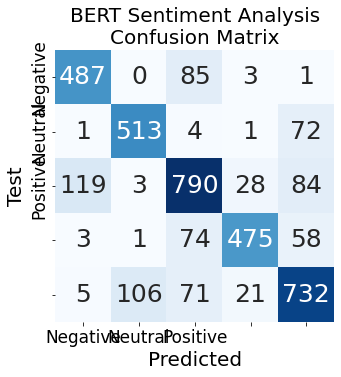

In [92]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')

In [94]:
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Negative', 'Neutral', 'Positive','Extremely Negative', 'Extremely Positive']))

	Classification Report for BERT:

                     precision    recall  f1-score   support

          Negative       0.79      0.85      0.82       576
           Neutral       0.82      0.87      0.85       591
          Positive       0.77      0.77      0.77      1024
Extremely Negative       0.90      0.78      0.83       611
Extremely Positive       0.77      0.78      0.78       935

         micro avg       0.80      0.80      0.80      3737
         macro avg       0.81      0.81      0.81      3737
      weighted avg       0.80      0.80      0.80      3737
       samples avg       0.80      0.80      0.80      3737

